#### ASSIGNMENT ON HOUSE PRODECTION PROJECT IN PREPARATION TO MACHINE LEARNING

In [ ]:
#Import the data from Dbeaver
#Ensure you have the necessary libraries installed

from sqlalchemy import create_engine
import pandas as pd
import urllib.parse # For URL encoding of the password
import re # Python’s regular expressions module for data cleaning
import psycopg2
import matplotlib.pyplot as plt



# Using sqlalchemy to read data from Dbeaver

username = "" # Username for the database
password = urllib.parse.quote_plus("") # Password for the database, URL encoded
host = "" # Hostname for the database
port =  # Port number for the database
database = "" # Name of the database

engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}?sslmode=require"
)
property_data = pd.read_sql("SELECT * FROM property_data", engine)



SyntaxError: invalid syntax (1710793489.py, line 18)

In [ ]:
# Display DataFrame information
print(property_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    BedRooms         954 non-null    float64
 1   Bath rooms        941 non-null    float64
 2   Size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year built        1000 non-null   int64  
 5   Garage Available  896 non-null    float64
 6   Furnishing        1000 non-null   object 
 7   House Condition   1000 non-null   object 
 8   Has_Pool          945 non-null    float64
 9   Lot Size          1000 non-null   float64
 10  Price($)          1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB
None


In [ ]:
# Check the first few rows of the DataFrame
property_data.index = range(1, len(property_data) + 1)  # Reset index to start from 1
print(property_data.head(10))

     BedRooms   Bath rooms  Size_sqft  location  year built  Garage Available  \
1          3.0         1.0       1149     Rural        2004               NaN   
2          NaN         2.0       1169     Rural        1989               1.0   
3          4.0         3.0       1409  Suburban        1993               1.0   
4          3.0         3.0       1647  Suburban        2021               0.0   
5          2.0         3.0       1865     Urban        2009               0.0   
6          2.0         2.0       1179    ruraal        2020               NaN   
7          1.0         2.0       2097  Suburban        2004               0.0   
8          5.0         3.0       1392  Suburban        1993               1.0   
9          3.0         1.0       1491     Rural        2014               0.0   
10         4.0         2.0       1201    ruraal        2013               0.0   

        Furnishing House Condition  Has_Pool  Lot Size  Price($)  
1      Unfurnished             new       

In [ ]:
print(property_data.tail(10))

       BedRooms   Bath rooms  Size_sqft   location  year built  \
991          4.0         3.0       1413      Urban        1993   
992          4.0         1.0       1377   Suburban        2010   
993          2.0         2.0       2471      Rural        2010   
994          3.0         1.0       1673     ruraal        1996   
995          3.0         3.0        949     ruraal        2003   
996          1.0         2.0       1274       urbn        2002   
997          5.0         NaN       1909  sub-urban        1997   
998          2.0         1.0       2335      Urban        1993   
999          NaN         1.0        866       urbn        1994   
1000         3.0         1.0        748   Suburban        1994   

      Garage Available      Furnishing House Condition  Has_Pool  Lot Size  \
991                1.0                            Good       0.0      0.22   
992                0.0        furnised             Old       0.0      0.10   
993                1.0  Semi furnished 

In [ ]:
#CLEANING THE DATA
# Clean column names to get rid of inconsistent formatting
property_data.columns = (
    property_data.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^a-z0-9_]', '_', regex=True)  #Regex to replace multiple underscores with a single underscore
    .str.replace(r'_+', '_', regex=True) #Regex to replace multiple underscores with a single underscore
    .str.strip('_')
)

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          954 non-null    float64
 1   bath_rooms        941 non-null    float64
 2   size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year_built        1000 non-null   int64  
 5   garage_available  896 non-null    float64
 6   furnishing        1000 non-null   object 
 7   house_condition   1000 non-null   object 
 8   has_pool          945 non-null    float64
 9   lot_size          1000 non-null   float64
 10  price             1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [ ]:
# Clean category typos from the dataset columns 
#using a dictionary to map common typos to their correct values
typo_fixes = {
    "furnised": "Furnished",
    "ruraal": "Rural",
    "rural": "Rural",
    "Suburban": "Sub_Urban",
    "new": "New",
    "urbn": "Urban",
    "Semi furnished": "Semi-Furnished",
    "sub-urban": "Sub_Urban",
    "old": "Old",
    "Sub-urban": "Sub_Urban",
    "gd": "Good"
}
#use loop to replace typos in all object type columns one at a time
for col in property_data.select_dtypes(include="object").columns: # Select only object type columns usually strings
    property_data[col] = property_data[col].replace(typo_fixes)

In [ ]:
# Fill missing numeric columns with the median
numeric_cols = property_data.select_dtypes(include=['number']).columns
property_data[numeric_cols] = property_data[numeric_cols].fillna(property_data[numeric_cols].median())

In [ ]:
#filling missing values in the 'furnishing' column with 'NULL'
#and replacing empty strings with 'NULL'
property_data['furnishing'] = property_data['furnishing'].replace("", "NULL").fillna("NULL")

In [ ]:
property_data['furnishing'] = property_data['furnishing'].fillna("NULL")


In [ ]:
#Categorical/text columns - fill with "NULL"
categorical_cols = property_data.select_dtypes(include=['object']).columns
property_data[categorical_cols] = property_data[categorical_cols].fillna("NULL")

# Verify no missing values remain
print(property_data.isnull().sum())


bedrooms            0
bath_rooms          0
size_sqft           0
location            0
year_built          0
garage_available    0
furnishing          0
house_condition     0
has_pool            0
lot_size            0
price               0
dtype: int64


In [ ]:
print(property_data.columns) # Display the cleaned column names


Index(['bedrooms', 'bath_rooms', 'size_sqft', 'location', 'year_built',
       'garage_available', 'furnishing', 'house_condition', 'has_pool',
       'lot_size', 'price'],
      dtype='object')


In [ ]:
#Confirming there are no missing values left in the DataFrame
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          1000 non-null   float64
 1   bath_rooms        1000 non-null   float64
 2   size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year_built        1000 non-null   int64  
 5   garage_available  1000 non-null   float64
 6   furnishing        1000 non-null   object 
 7   house_condition   1000 non-null   object 
 8   has_pool          1000 non-null   float64
 9   lot_size          1000 non-null   float64
 10  price             1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [ ]:
# Capitalize the first letter of each column name
property_data.columns = property_data.columns.str.capitalize()

# Confirm the change
print(property_data.columns)


Index(['Bedrooms', 'Bath_rooms', 'Size_sqft', 'Location', 'Year_built',
       'Garage_available', 'Furnishing', 'House_condition', 'Has_pool',
       'Lot_size', 'Price'],
      dtype='object')


In [ ]:
# Display the cleaned column names
print(property_data.columns.tolist())


['Bedrooms', 'Bath_rooms', 'Size_sqft', 'Location', 'Year_built', 'Garage_available', 'Furnishing', 'House_condition', 'Has_pool', 'Lot_size', 'Price']


In [ ]:
from datetime import datetime #To get the current year so as to calculate  how long the property has been in existence
current_year = datetime.now().year
print(current_year)

2025


In [ ]:
#Part of feature engineering and modelling
#Adding a new column for the age of the property
# the new column house_age
property_data['Existence'] = current_year - property_data['Year_built']
property_data.index = range(1, len(property_data) + 1)# Reset index to start from 1
print(property_data['Existence'])


1       21
2       36
3       32
4        4
5       16
        ..
996     23
997     28
998     32
999     31
1000    31
Name: Existence, Length: 1000, dtype: int64


In [ ]:
#Save cleaned data to Desktop
property_data.to_csv(r"C:\Users\ADEN\Desktop\PYTHON\Dbeaver Project\property_data_cleaned.csv", index=False)

#### FEATURE ENGINEERING & MODELLING

In [ ]:
#VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns


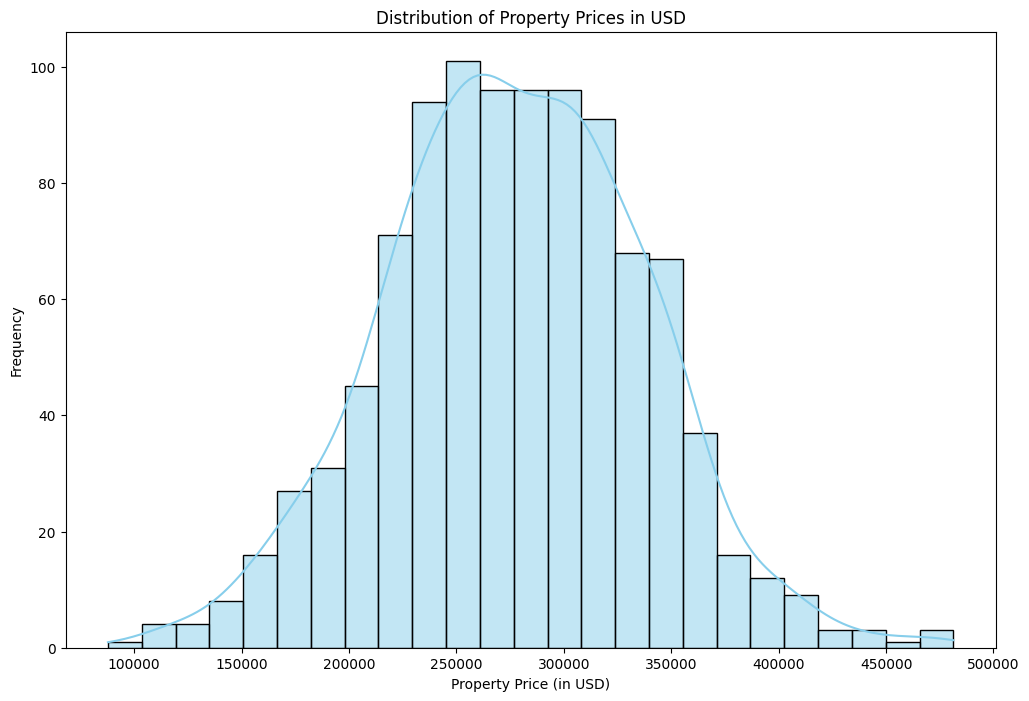

In [ ]:
# The distribution of the dependent variable - Price
# It is a continuous variable, so we use either the boxplot or the histogram to visualiza it
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Price', kde=True, color='skyblue')
plt.title('Distribution of Property Prices in USD')
plt.ylabel('Frequency')
plt.xlabel('Property Price (in USD)')
plt.show()


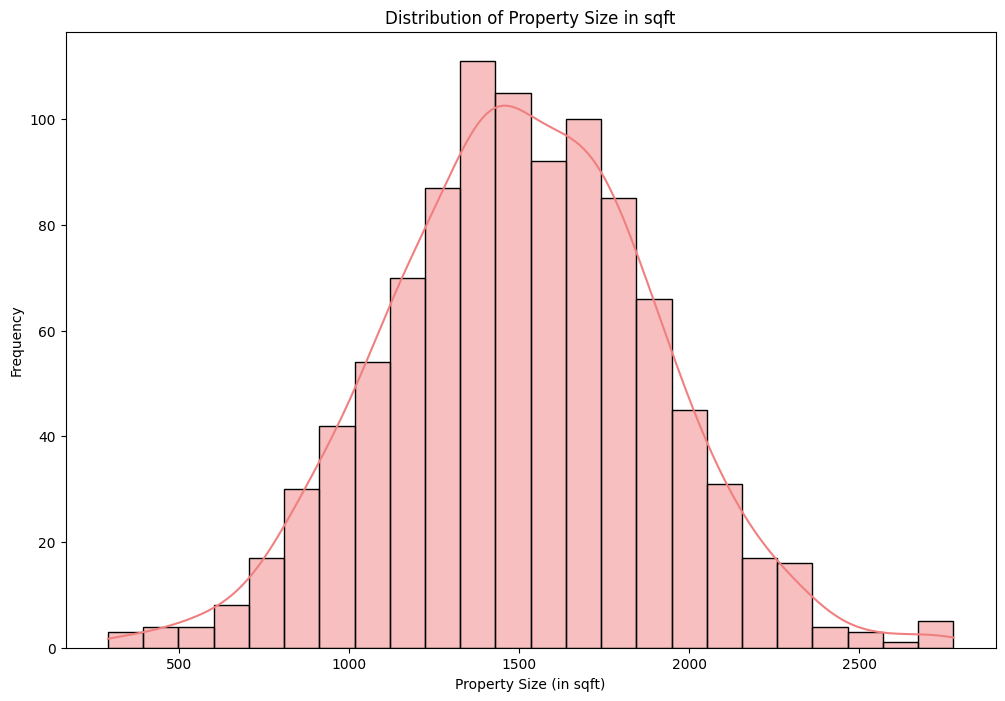

In [ ]:
#Distribution of the independent variable - Size in sqft
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Size_sqft', kde=True, color='lightcoral')
plt.title('Distribution of Property Size in sqft')
plt.ylabel('Frequency')
plt.xlabel('Property Size (in sqft)')
plt.show()

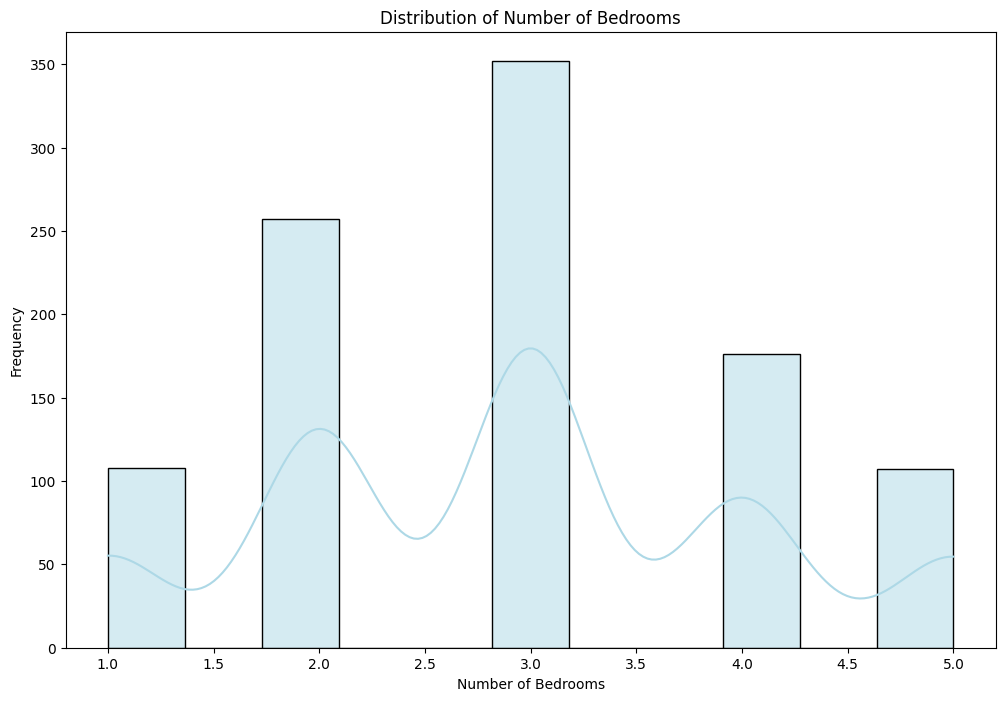

In [ ]:
#Distru=ibution of independent variable - Bedrooms
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Bedrooms', kde=True, color='lightblue')
plt.title('Distribution of Number of Bedrooms')
plt.ylabel('Frequency')
plt.xlabel('Number of Bedrooms')
plt.show()

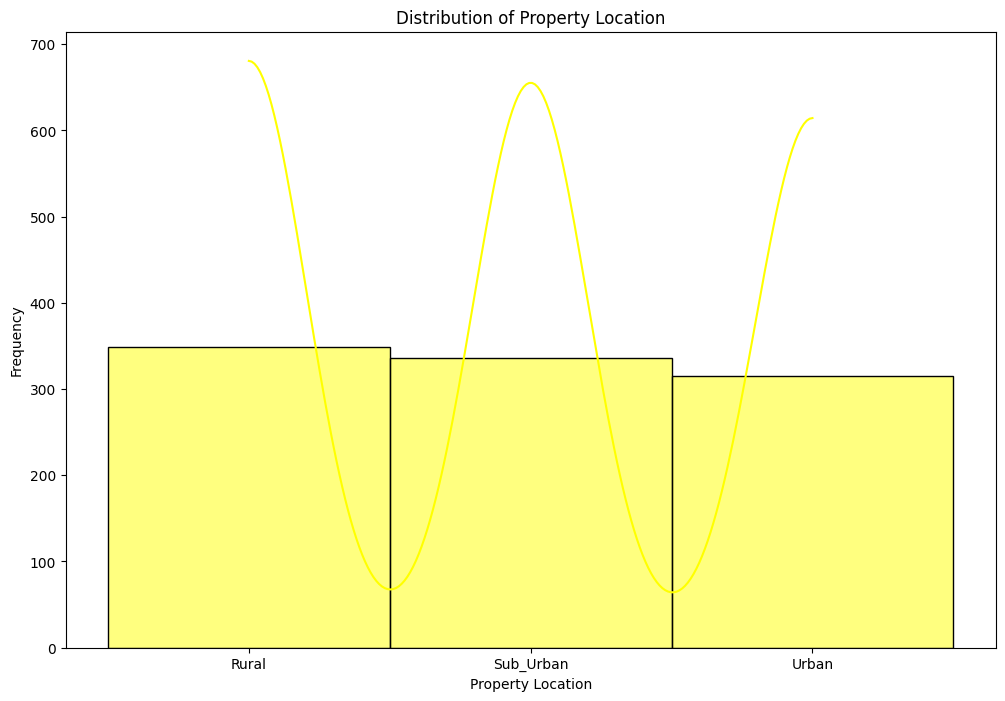

In [ ]:
#Distribution of independent variable - location
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Location', kde=True, color='yellow')
plt.title('Distribution of Property Location')
plt.ylabel('Frequency')
plt.xlabel('Property Location')
plt.show()

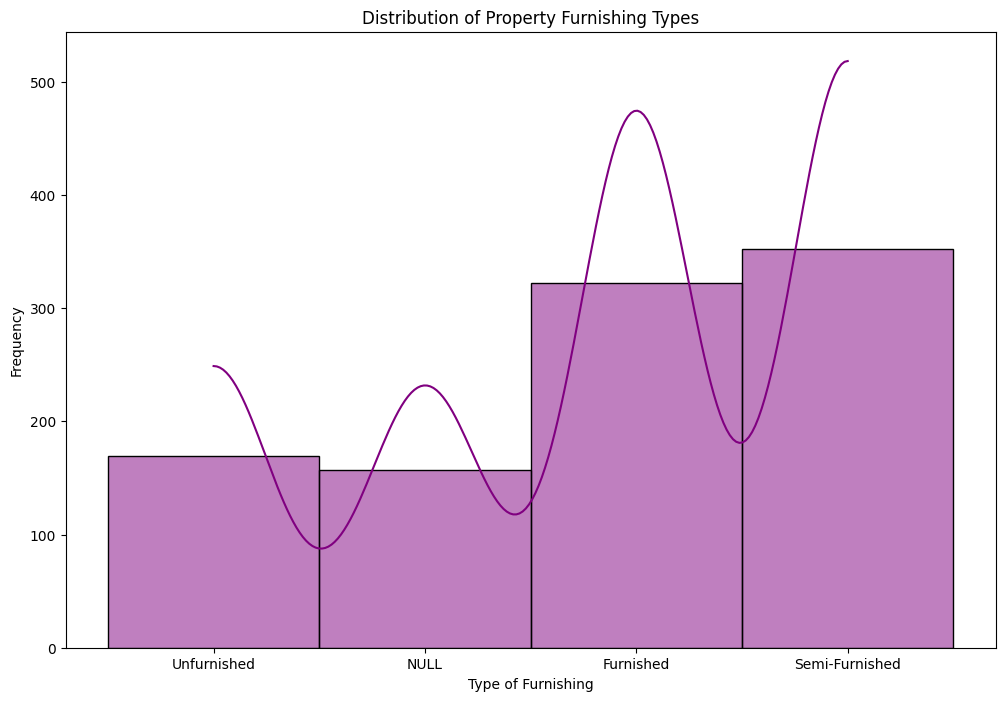

In [ ]:
#Distribution according to the type of furnishing
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Furnishing', kde=True, color='purple')
plt.title('Distribution of Property Furnishing Types')
plt.ylabel('Frequency')
plt.xlabel('Type of Furnishing')
plt.show()

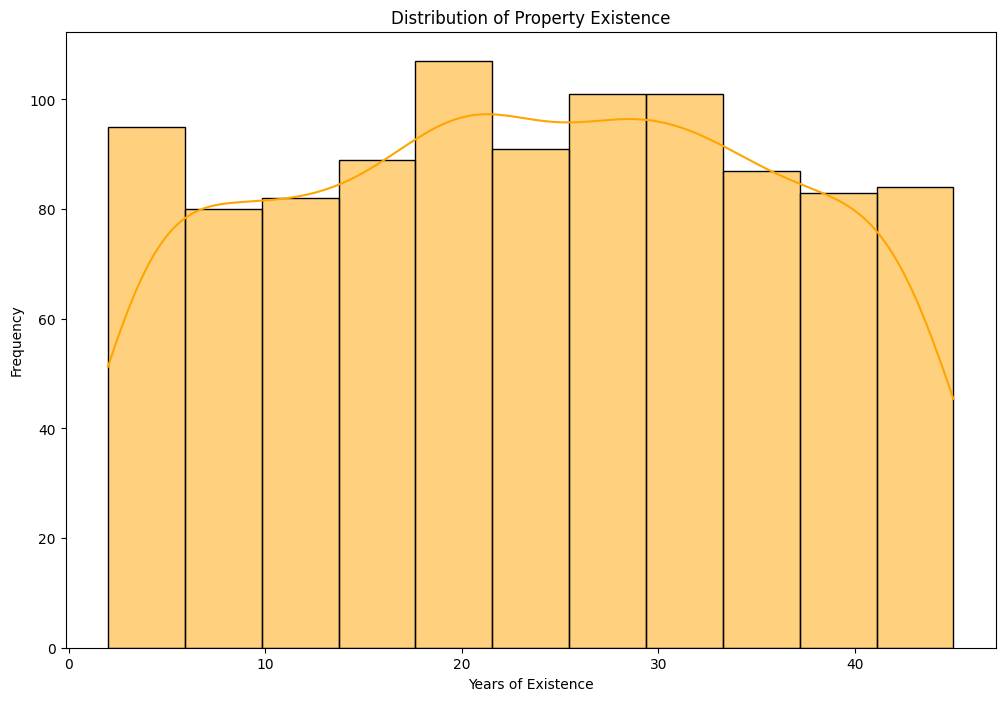

In [ ]:
#Distribution according to the existence of the property
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Existence', kde=True, color='orange')
plt.title('Distribution of Property Existence')
plt.ylabel('Frequency')
plt.xlabel('Years of Existence')
plt.show()

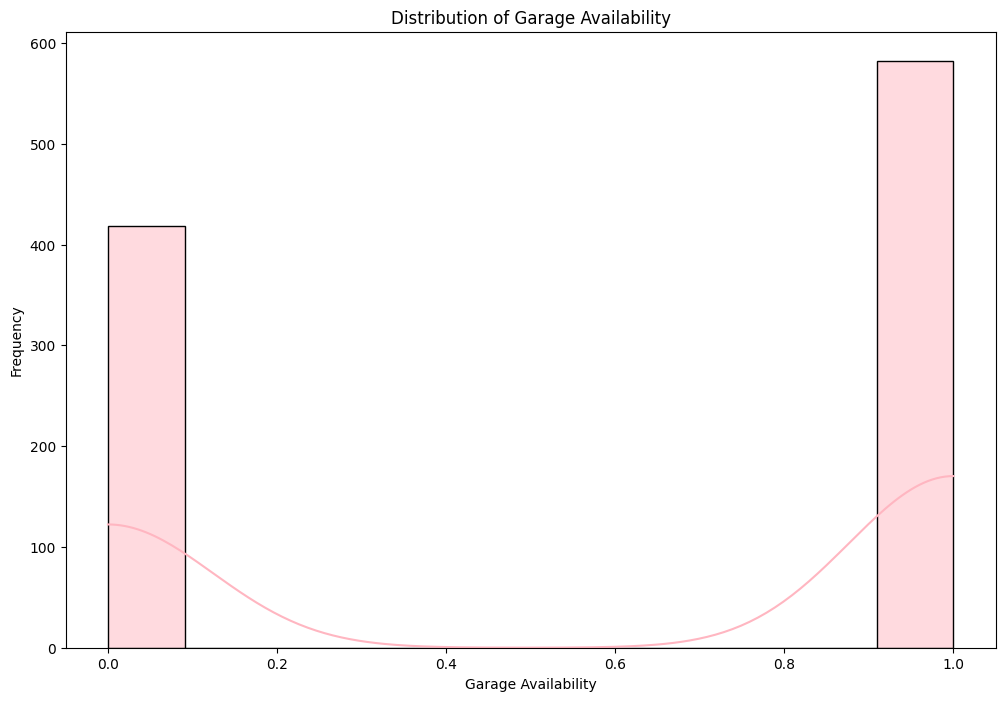

In [ ]:
#Distribution according to the garage availability
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Garage_available', kde=True, color='lightpink')
plt.title('Distribution of Garage Availability')
plt.ylabel('Frequency')
plt.xlabel('Garage Availability')
plt.show()

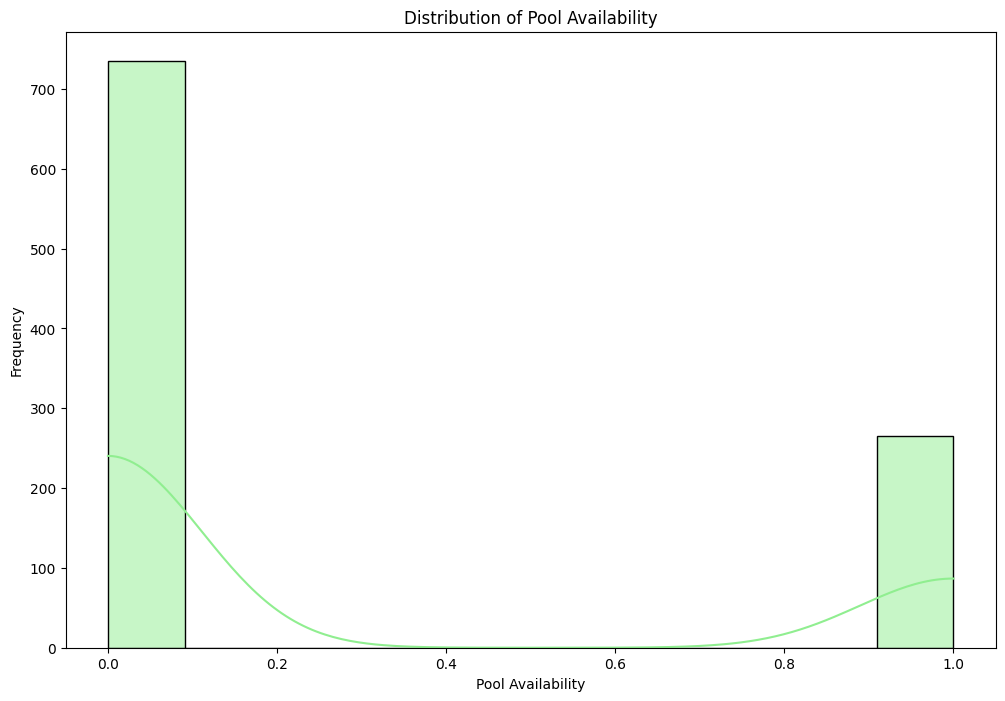

In [ ]:
#Distribution of independent variable - pool availability
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='Has_pool', kde=True, color='lightgreen')
plt.title('Distribution of Pool Availability')
plt.ylabel('Frequency')
plt.xlabel('Pool Availability')
plt.show()

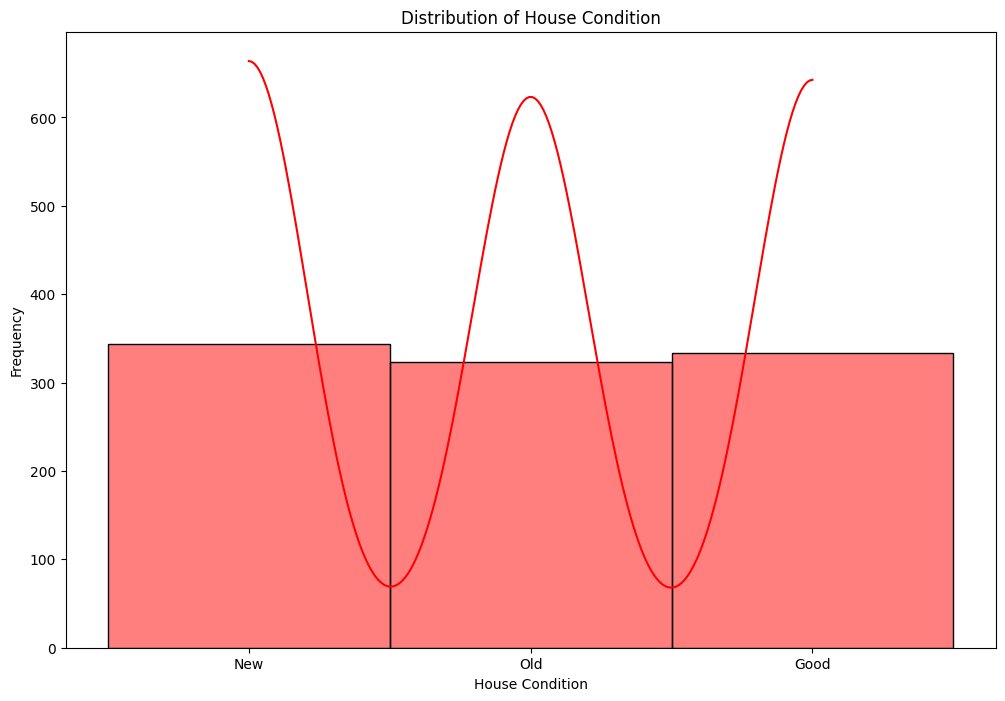

In [ ]:
#Distribution to the house condition
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='House_condition', kde=True, color='red')
plt.title('Distribution of House Condition')
plt.ylabel('Frequency')
plt.xlabel('House Condition')
plt.show()